In [1]:
import utils
from utils import *

trainPath=r"C:\Users\sivateja_k\Desktop\NLP_Project\dataset\Reviews.csv"
review,sentiment,df=data_preprocess(trainPath)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\sivateja_k\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


resulting filtered data length after dropping rating 3 should be 525814
Filtered data length is 525814


C:\Users\sivateja_k\Desktop\NLP_Project\utils.py:102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['sentiment']=filtered_data['Score'].apply(assign_score)
C:\Users\sivateja_k\Anaconda3\envs\nlpproject\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Accuracy : 0.9284243189806678
              precision    recall  f1-score   support

           0       0.88      0.63      0.73     11434
           1       0.93      0.98      0.96     61398

    accuracy                           0.93     72832
   macro avg       0.91      0.81      0.85     72832
weighted avg       0.93      0.93      0.92     72832

======Confusion Matrix======

 [[ 7161  4273]
 [  940 60458]]


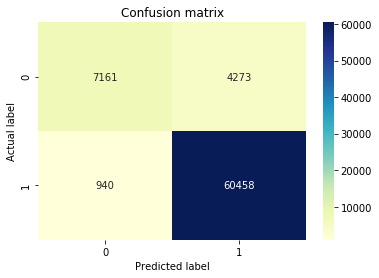

-----------------Top 20 positive words------------
 Coefficient            Word
   19.505135           great
   16.041275          delici
   15.860921            best
   15.629774            love
   14.197556         perfect
   12.088944           excel
   10.789755            good
   10.637773            nice
   10.213893  high recommend
    9.865350            amaz
    9.539718         favorit
    8.723078          awesom
    8.678343          wonder
    8.404713           tasti
    8.299969            easi
    7.960288           happi
    7.959817           thank
    7.716638           yummi
    7.628378            keep
    7.341480          smooth
-----------------Top 20 negative words------------
 Coefficient        Word
   -6.930101      refund
   -6.985643        poor
   -7.085862        mayb
   -7.464417       money
   -7.666302       sorri
   -7.742578        wast
   -7.784899   tasteless
   -7.940912         not
   -8.231679        weak
   -8.721148     disgust
   -8.869021  

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
get_accuracy(review,sentiment,TfidfVectorizer(ngram_range=(1,2)),LogisticRegression(max_iter=300),show_coefficients=True)

In [3]:
review_train,review_test,target_train,target_test=train_test_split(review,sentiment,test_size=0.2,random_state=0)

Accuracy : 0.6472704305799648
              precision    recall  f1-score   support

           0       0.24      0.55      0.33     11434
           1       0.89      0.66      0.76     61398

    accuracy                           0.65     72832
   macro avg       0.56      0.61      0.55     72832
weighted avg       0.79      0.65      0.69     72832

======Confusion Matrix======

 [[ 6340  5094]
 [20596 40802]]


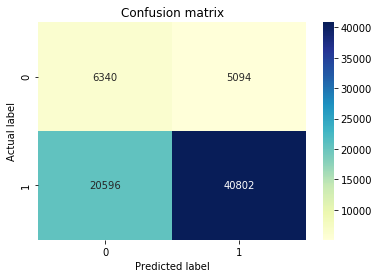

In [4]:
yhat=append_senti_to_sent(list(review_test))
print("Accuracy :", np.mean(yhat == target_test))
print(classification_report(target_test, yhat))
confusionMatrix(target_test,yhat)